C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Epoch 1/200
24/24 [==============================] - 1s 30ms/step - loss: 0.2468 - val_loss: 0.0447
Epoch 2/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0519 - val_loss: 0.0295
Epoch 3/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0315 - val_loss: 0.0141
Epoch 4/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0190 - val_loss: 0.0037
Epoch 5/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0120 - val_loss: 0.0026
Epoch 6/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0107 - val_loss: 8.3921e-04
Epoch 7/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0088 - val_loss: 0.0010
Epoch 8/200
24/24 [==============================] - 0s 12ms/step - loss: 0.0089 - val_loss: 3.9580e-04
Epoch 9/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0083 - val_loss: 8.9506e-04
Epoch 10/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0083 - val_

24/24 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 8.7322e-05
Epoch 80/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0032 - val_loss: 3.9135e-05
Epoch 81/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 1.4642e-04
Epoch 82/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 1.4995e-04
Epoch 83/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 6.1019e-05
Epoch 84/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0037 - val_loss: 1.7675e-04
Epoch 85/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 2.2184e-05
Epoch 86/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0031 - val_loss: 3.6945e-04
Epoch 87/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0023 - val_loss: 3.4607e-04
Epoch 88/200
24/24 [==============================] - 0s 15ms/step -

24/24 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 5.1880e-05
Epoch 157/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 1.1558e-04
Epoch 158/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 4.9165e-05
Epoch 159/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 1.9539e-04
Epoch 160/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0019 - val_loss: 3.9473e-04
Epoch 161/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 7.7630e-05
Epoch 162/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 1.4686e-04
Epoch 163/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 9.0519e-05
Epoch 164/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 2.6747e-05
Epoch 165/200
24/24 [==============================] - 0s 15

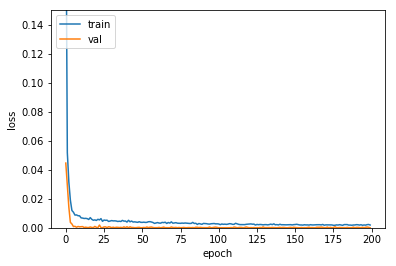

Train Score:  5.583725942415185e-05
Validation Score:  5.5172415159177035e-05
Test Score:  5.5172415159177035e-05


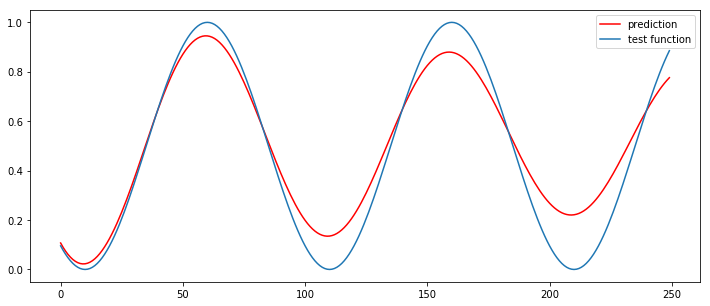

In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back),0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40

#1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

#데이터 전처리
scaler = MinMaxScaler(feature_range=(0,1))
signal_data = scaler.fit_transform(signal_data)

#데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

#데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

#데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



#2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))


#3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')


#4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

#5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validation Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

#7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label="prediction")
plt.plot(np.arange(look_ahead), y_test[:look_ahead],label="test function")
plt.legend()
plt.show()